In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline


import os, cv2

from IPython.display import clear_output

%matplotlib inline

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
def detect_face(frame):
    detector=cv2.CascadeClassifier('C:/Users/DELL/haarcascade_frontalface_default.xml') 
    faces=detector.detectMultiScale(frame,scaleFactor=1.3,minNeighbors=3)
    return faces

In [3]:
def cut_faces(image, faces_coord):
    faces = []
      
    for (x, y, w, h) in faces_coord:
        #w_rm = int(0.2 * w / 2)
        faces.append(image[y: y + h, x : x + w ])
         
    return faces

In [4]:
def normalize_intensity(images):
    images_norm = []
    for image in images:
        is_color = len(image.shape) == 3 
        if is_color:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images_norm.append(cv2.equalizeHist(image))
    return images_norm

In [5]:
def normalize_faces(frame, faces_coord):
    faces = cut_faces(frame, faces_coord)
    faces = normalize_intensity(faces)
    
    faces = resize(faces)
    return faces

In [6]:
def resize(images,size=(47,62)):
    image_resize = []
    
    for image in images:
        if image.shape < size:
            img_size = cv2.resize(image,size,interpolation=cv2.INTER_CUBIC)
        else:
            img_size = cv2.resize(image,size,interpolation=cv2.INTER_AREA)
        image_resize.append(img_size)
        
    return image_resize


In [7]:
def plot_show(image,title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.axis("off")
    plt.title(title)
    plt.imshow(image,cmap="Greys_r")
    plt.show()

In [8]:
def draw_rectangle(image, coords):
    for (x, y, w, h) in coords:
        #w_rm = int(0.2 * w / 2) 
        cv2.rectangle(image, (x , y), (x + w , y + h), (0,0,255),2)

In [9]:
def collect_dataset():
    images = []
    labels = []
    labels_dic = {}
    size=(47,62)
    #people = [person for person in os.listdir("Male_female/")]
    people = [person for person in os.listdir("C:\\Users\\DELL\\face_model\\Research 1\\train")]
    #people = [person for person in os.listdir("people/")]
    for i, person in enumerate(people):
        labels_dic[i] = person
        for image in os.listdir("C:\\Users\\DELL\\face_model\\Research 1\\train\\" + person):
            if image.endswith('.jpg'):
                img=cv2.imread("C:\\Users\\DELL\\face_model\\Research 1\\train\\" + person + '/' + image, 0)
                images.append(cv2.resize(img, size)) 
                labels.append(i)
    return (images, np.array(labels), labels_dic)

In [10]:
images, labels, labels_dic = collect_dataset()

In [11]:
labels_dic

{0: 'ben_afflek',
 1: 'elton_john',
 2: 'jerry_seinfeld',
 3: 'madonna',
 4: 'mindy_kaling'}

In [12]:
len(images)

102

In [13]:
X_train=np.asarray(images)
Y_train=labels

In [14]:
X_train.shape

(102, 62, 47)

In [15]:
Y_train.shape

(102,)

In [16]:
X_train.dtype

dtype('uint8')

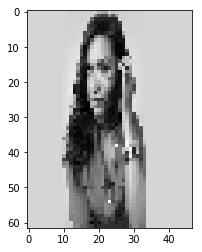

In [17]:
import matplotlib.pyplot as plt
plt.imshow(X_train[100], cmap="gray")

In [18]:
train=X_train.reshape(len(X_train),-1)

In [19]:
train.shape

(102, 2914)

In [20]:
from sklearn.decomposition import PCA

Text(0,0.5,'cumulative explained variance')

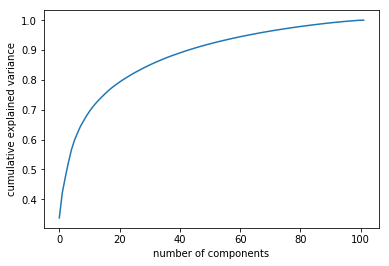

In [21]:
pca1 = PCA()
pca1.fit(train)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [22]:
pca1 = PCA(n_components=200)

In [35]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_ntrain=sc.fit_transform(train)
X_ntest= sc.transform(test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
pca1.n_components
new_train=pca1.fit_transform(X_ntrain)

In [37]:
new_train.shape

(102, 102)

In [38]:
from sklearn.svm import SVC
svm= SVC(kernel='linear', probability=True)
svm.fit(new_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
svm.score(pca1.transform(X_ntest), Y_test)

0.52

In [40]:
pred=svm.predict(pca1.transform(X_ntest))

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(Y_test,pred)

0.52

In [43]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_test, pred)

In [ ]:
np.where(Y_test != pred)

In [23]:
def test_dataset():
    images = []
    labels = []
    labels_dic = {}
    size=(47,62)
    #people = [person for person in os.listdir("Male_female/")]
    people = [person for person in os.listdir("C:\\Users\\DELL\\face_model\\Research 1\\val")]
    #people = [person for person in os.listdir("people/")]
    for i, person in enumerate(people):
        labels_dic[i] = person
        for image in os.listdir("C:\\Users\\DELL\\face_model\\Research 1\\val\\" + person):
            if image.endswith('.jpg'):
                img=cv2.imread("C:\\Users\\DELL\\face_model\\Research 1\\val\\" + person + '/' + image, 0)
                images.append(cv2.resize(img, size)) 
                labels.append(i)
    return (images, np.array(labels), labels_dic)

In [24]:
images, labels, labels_dic = test_dataset()

In [25]:
len(images)

25

In [26]:
labels_dic

{0: 'ben_afflek',
 1: 'elton_john',
 2: 'jerry_seinfeld',
 3: 'madonna',
 4: 'mindy_kaling'}

In [27]:
X_test= np.asarray(images)

In [28]:
X_test.shape

(25, 62, 47)

In [29]:
test=X_test.reshape(len(X_test),-1)

In [30]:
test.shape

(25, 2914)

In [31]:
Y_test=labels

In [32]:
Y_test.shape

(25,)

In [33]:
np.unique(Y_test)

array([0, 1, 2, 3, 4])

In [44]:
import pickle

filename = 'svc_face.pkl'
f=open(filename, 'wb')
pickle.dump(svm,f)
 

f.close()

In [45]:
filename = 'pca_face.pkl'
f=open(filename, 'wb')
pickle.dump(pca1,f)
 

f.close()

In [46]:
filename = 'sc_face.pkl'
f=open(filename, 'wb')
pickle.dump(sc,f)
 

f.close()

## ------------------------------------------------- END OF CODE-------------------------------------------------------

In [ ]:
param_grid = {'C':[.0001,.001,.01,.1,1,10]}
kf=KFold(n_splits=5,shuffle=True)
gs_svc = GridSearchCV(SVC(kernel='linear',probability=True),param_grid=param_grid,cv=kf,scoring='accuracy')
gs_svc.best_score_
gs_svc.best_params_
svc1 = gs_svc.best_estimator_

In [ ]:
import pickle

filename = 'svc_face.pkl'
f=open(filename, 'wb')
pickle.dump(svc1,f)
 

f.close()

In [ ]:
import pickle, os, cv2
import numpy as np

filename = 'svc_face.pkl'
svc1 = pickle.load(open(filename, 'rb'))

In [ ]:
def resize_1(image,size=(47,62)):
    image_resize = []
    
    #for image in images:
    if image.shape < size:
        img_size = cv2.resize(image,size,interpolation=cv2.INTER_CUBIC)
    else:
        img_size = cv2.resize(image,size,interpolation=cv2.INTER_AREA)
    image_resize.append(img_size)
        
    return image_resize